In [45]:
import pandas as pd 
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
#%matplotlib inline
sns.set(style="whitegrid")

import warnings 
warnings.filterwarnings('ignore')

In [11]:
frq_data = pd.read_csv("frequency_domain_features_train.csv",index_col="uuid")
hr_data = pd.read_csv("heart_rate_non_linear_features_train.csv",index_col="uuid")
time_domine_data = pd.read_csv("time_domain_features_train.csv",index_col="uuid")

In [12]:
data = pd.concat([frq_data,time_domine_data,hr_data],axis=1)

In [20]:
print(frq_data.shape)
print(hr_data.shape)
print(time_domine_data.shape)

print(data.columns)
print(data.shape)


(369289, 11)
(369289, 6)
(369289, 19)
Index(['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
       'TP', 'LF_HF', 'HF_LF', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD',
       'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'SD1', 'SD2',
       'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')
(369289, 36)


In [54]:
data.isnull().any()

VLF                  False
VLF_PCT              False
LF                   False
LF_PCT               False
LF_NU                False
HF                   False
HF_PCT               False
HF_NU                False
TP                   False
LF_HF                False
HF_LF                False
MEAN_RR              False
MEDIAN_RR            False
SDRR                 False
RMSSD                False
SDSD                 False
SDRR_RMSSD           False
HR                   False
pNN25                False
pNN50                False
KURT                 False
SKEW                 False
MEAN_REL_RR          False
MEDIAN_REL_RR        False
SDRR_REL_RR          False
RMSSD_REL_RR         False
SDSD_REL_RR          False
SDRR_RMSSD_REL_RR    False
KURT_REL_RR          False
SKEW_REL_RR          False
SD1                  False
SD2                  False
sampen               False
higuci               False
datasetId            False
condition            False
dtype: bool

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369289 entries, 89df2855-56eb-4706-a23b-b39363dd605a to 1f2eb52d-4f09-4921-a383-ef1bc6221789
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VLF                369289 non-null  float64
 1   VLF_PCT            369289 non-null  float64
 2   LF                 369289 non-null  float64
 3   LF_PCT             369289 non-null  float64
 4   LF_NU              369289 non-null  float64
 5   HF                 369289 non-null  float64
 6   HF_PCT             369289 non-null  float64
 7   HF_NU              369289 non-null  float64
 8   TP                 369289 non-null  float64
 9   LF_HF              369289 non-null  float64
 10  HF_LF              369289 non-null  float64
 11  MEAN_RR            369289 non-null  float64
 12  MEDIAN_RR          369289 non-null  float64
 13  SDRR               369289 non-null  float64
 14  RMSSD              369289 non-null  floa

In [53]:
data['condition'].value_counts()

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1.667903e+03,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,6.635024e+01,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,7.827163e+02,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,3.204703e+01,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,9.664314e+01,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,2.484194e+01,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513e+00,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860e+00,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2.796857e+03,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,2.878975e+01,80.429614,7796.443096


In [36]:
data["datasetId"].value_counts()

2    369289
Name: datasetId, dtype: int64

In [51]:
def plot_distribution(data,column_name):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(5,5))
    #sns.histplot(data=data,x=column_name,kde=True,ax=ax[0],bins=10)
    sns.distplot(data[column_name],ax=ax[0],bins=10)
    sns.boxplot(data=data,y=column_name,orient='v',ax=ax[1])
    fig.suptitle("{} - {}".format("Distribution for ",column_name))
    plt.show()

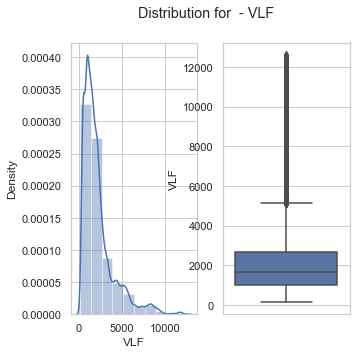

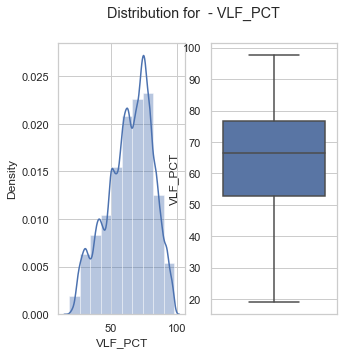

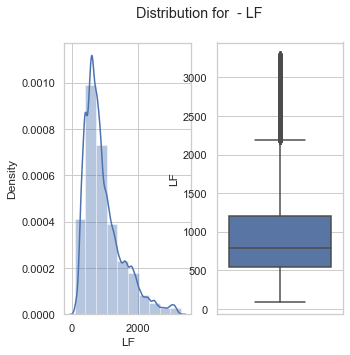

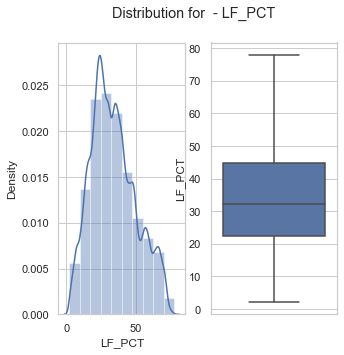

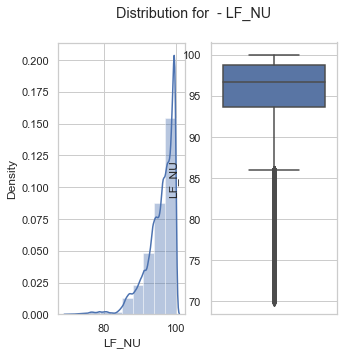

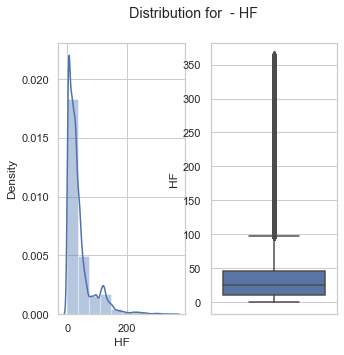

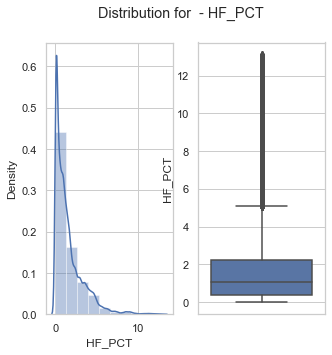

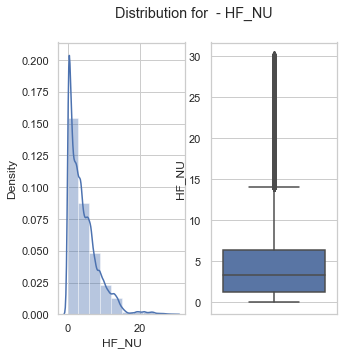

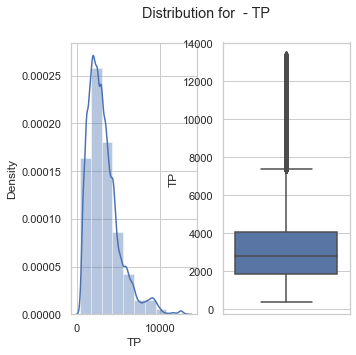

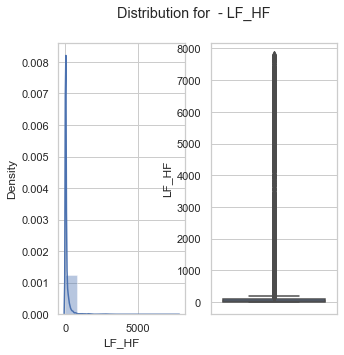

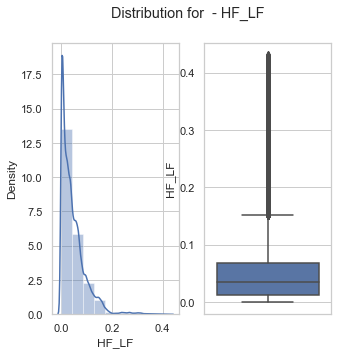

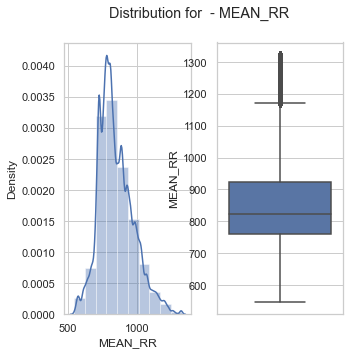

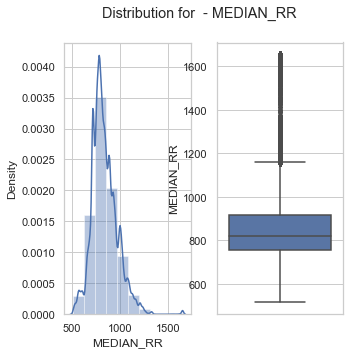

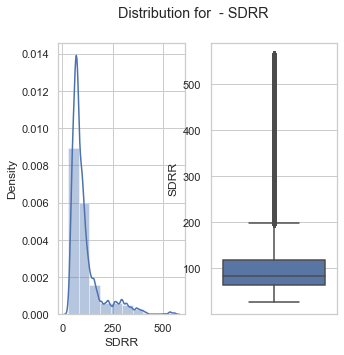

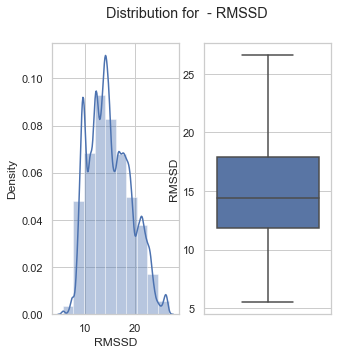

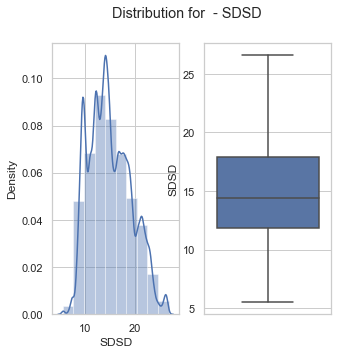

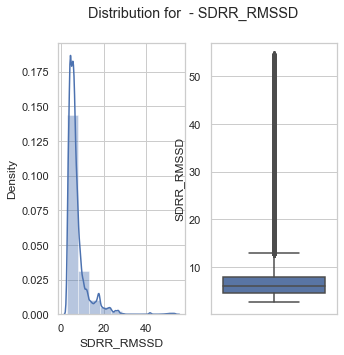

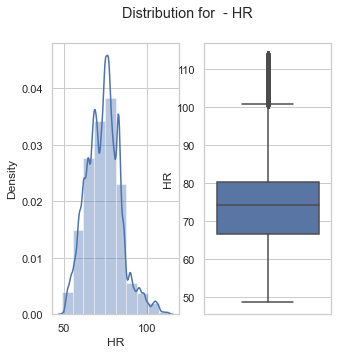

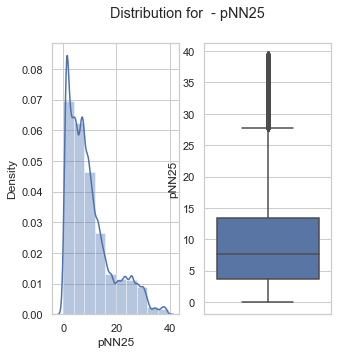

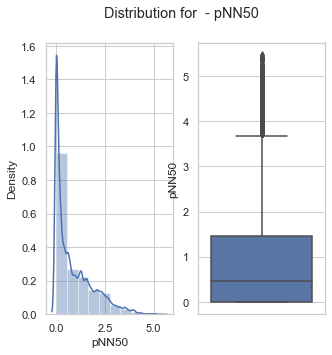

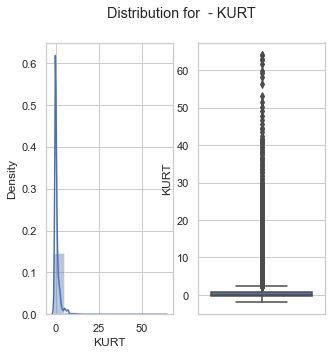

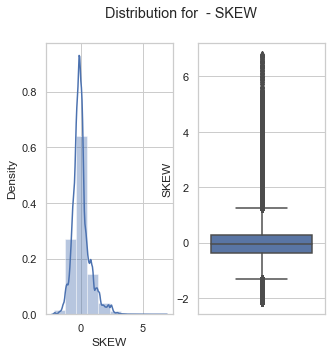

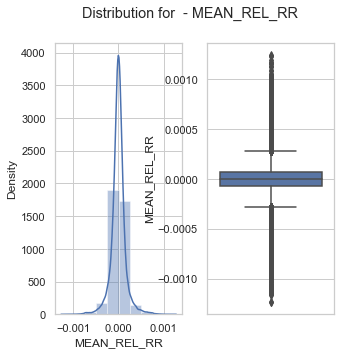

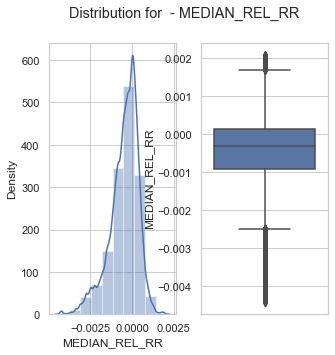

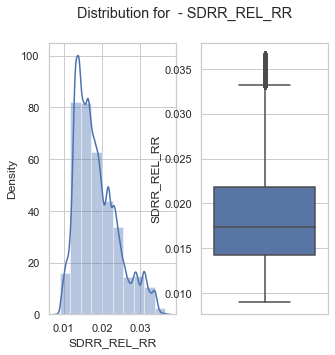

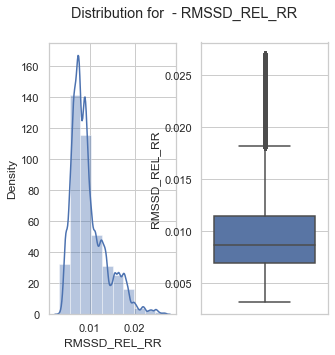

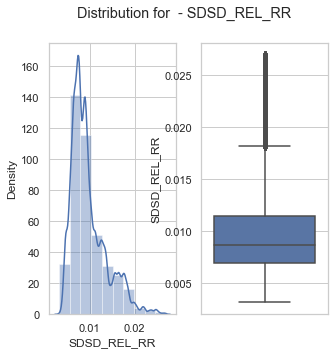

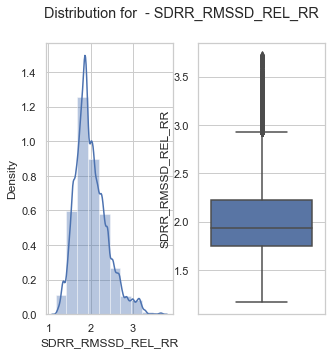

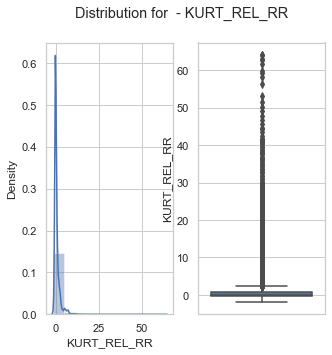

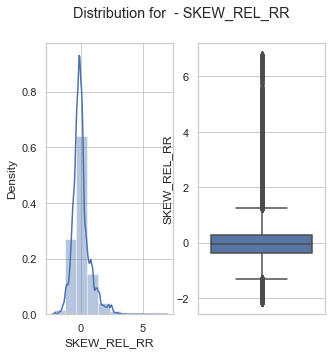

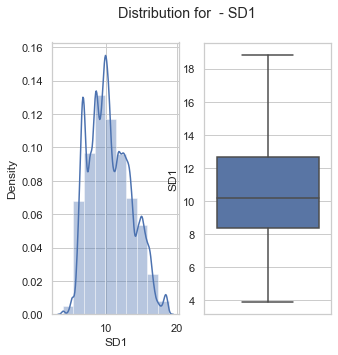

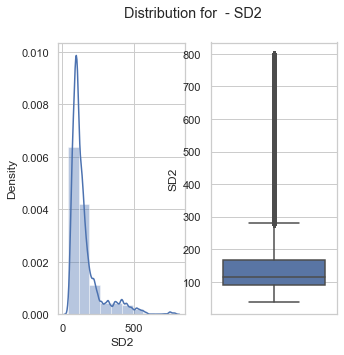

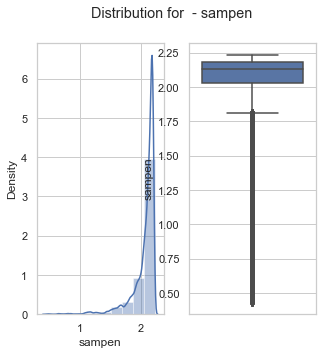

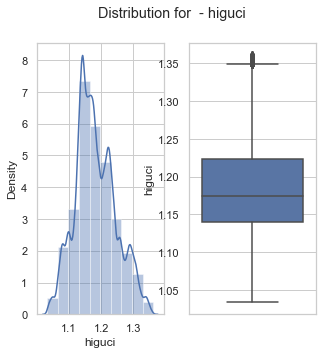

In [55]:
for column_name in ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
       'TP', 'LF_HF', 'HF_LF', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD',
       'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'SD1', 'SD2',
       'sampen', 'higuci']:
    plot_distribution(data,column_name)

In [59]:
skewness = data.skew(axis=0).to_frame("skewness")
skewness.style.applymap(lambda x:"background-color:red" if x>3 else ("background-color:orange" if x>1 else ""))


,skewness
VLF,1.960735
VLF_PCT,-0.410836
LF,1.349076
LF_PCT,0.425164
LF_NU,-1.645603
HF,2.476530
HF_PCT,2.021882
HF_NU,1.645603
TP,1.452435
LF_HF,9.781091


In [60]:
kurtos = data.kurt(axis=0).to_frame("kurtos")
kurtos.style.applymap(lambda x:"background-color:red" if x>10 else ("background-color:orange" if x>7 else ""))

,kurtos
VLF,4.493563
VLF_PCT,-0.520971
LF,1.739223
LF_PCT,-0.489052
LF_NU,3.852707
HF,7.961637
HF_PCT,5.517449
HF_NU,3.852707
TP,2.813712
LF_HF,133.475215
